# Reflection (Revise)

---

In [ ]:
from dotenv import load_dotenv
import pandas as pd
from pathlib import Path
import json
from dotenv import load_dotenv
import os 
import pprint
from IPython.display import Image, display
from typing import TypedDict, Annotated, Literal, Dict, Any

Import the necessary classes from **Langchain** and **Langgraph**

In [15]:
from langchain.chat_models import init_chat_model
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from typing import Annotated, List, Sequence
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
# Load environment variables from .env file
load_dotenv()

True

We define an LLM model to use in a zero-shot mode to answer user questions

In [5]:
llm_model = "openai:"+os.getenv("OPENAI_MODEL")
print(llm_model)
llm = init_chat_model(llm_model, temperature=0)

openai:gpt-4o-mini


## Generation part

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an essay assistant tasked with writing excellent 5-paragraph essays."
            " Generate the best essay possible for the user's request."
            " If the user provides critique, respond with a revised version of your previous attempts.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

generate = prompt | llm # Chain for generating an essay version

In [9]:
from rich.console import Console
from rich.markdown import Markdown

# This console is only for rendering Markup content nicely
console = Console()

In [11]:
hint = "Write an essay on why the little prince is relevant in modern childhood"

essay = ""
request = HumanMessage(
    content=hint
)
for chunk in generate.stream({"messages": [request]}):
    print(chunk.content, end="")
    essay += chunk.content

console.print(Markdown(essay))

**The Relevance of "The Little Prince" in Modern Childhood**

Antoine de Saint-Exupéry's "The Little Prince," first published in 1943, has transcended generations, captivating readers with its profound themes and whimsical storytelling. In an age dominated by technology and rapid change, the lessons embedded in this timeless tale remain strikingly relevant to modern childhood. The story's exploration of imagination, the importance of relationships, and the critique of adult values resonate deeply with children today, making it a vital part of their literary landscape.

One of the most significant aspects of "The Little Prince" is its celebration of imagination and creativity. In a world increasingly focused on standardized education and digital distractions, the book encourages children to embrace their imaginative capabilities. The Little Prince himself embodies the spirit of curiosity and wonder, exploring various planets and meeting unique characters that challenge conventional thin

The Relevance of "The Little Prince" in Modern Childhood                                                           

Antoine de Saint-Exupéry's "The Little Prince," first published in 1943, has transcended generations, captivating  
readers with its profound themes and whimsical storytelling. In an age dominated by technology and rapid change,   
the lessons embedded in this timeless tale remain strikingly relevant to modern childhood. The story's exploration 
of imagination, the importance of relationships, and the critique of adult values resonate deeply with children    
today, making it a vital part of their literary landscape.                                                         

One of the most significant aspects of "The Little Prince" is its celebration of imagination and creativity. In a  
world increasingly focused on standardized education and digital distractions, the book encourages children to     
embrace their imaginative capabilities. The Little Prince himself embodies the spirit of curiosity and wonder,     
exploring various planets and meeting unique characters that challenge conventional thinking. This narrative       
invites children to dream, question, and explore their own worlds, fostering a sense of creativity that is         
essential for personal development. In a time when children are often pressured to conform to societal             
expectations, the story serves as a reminder of the importance of nurturing one's imagination.                     

Moreover, "The Little Prince" emphasizes the value of relationships and emotional connections. The bond between the
Little Prince and his rose illustrates the significance of love, care, and responsibility. In an era where social  
media often replaces face-to-face interactions, the book's message about the importance of genuine relationships is
more pertinent than ever. Children today face challenges in forming meaningful connections, often feeling isolated 
despite being constantly connected online. The Little Prince teaches that true relationships require effort and    
understanding, encouraging children to cultivate empathy and compassion in their interactions with others.         

Additionally, the story critiques adult values, highlighting the absurdities of the adult world through the eyes of
a child. The Little Prince encounters various characters, such as the businessman and the geographer, who embody   
the often misguided priorities of adulthood—materialism, power, and superficiality. This critique resonates with   
modern children, who are increasingly aware of societal pressures and the complexities of adult life. By presenting
these themes through a child's perspective, Saint-Exupéry invites young readers to question the values they observe
in the world around them, fostering critical thinking and self-reflection.                                         

In conclusion, "The Little Prince" remains a relevant and essential read for modern childhood. Its celebration of  
imagination, emphasis on meaningful relationships, and critique of adult values provide valuable lessons for       
children navigating today's complex world. As they encounter the whimsical yet profound journey of the Little      
Prince, young readers are encouraged to embrace their creativity, cultivate empathy, and question societal norms.  
In a rapidly changing landscape, the timeless wisdom of "The Little Prince" continues to inspire and guide         
children, making it a cherished classic for generations to come.

## Reflection part

In [ ]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a teacher grading an essay submission. Generate critique and recommendations for the user's submission."
            " Provide detailed recommendations, including requests for length, depth, style, etc.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)
reflect = reflection_prompt | llm # Chain for reflecting on the essay

In [13]:
reflection = ""
for chunk in reflect.stream({"messages": [request, HumanMessage(content=essay)]}):
    print(chunk.content, end="")
    reflection += chunk.content

console.print(Markdown(reflection))

**Critique and Recommendations for Your Essay on "The Little Prince"**

Your essay on the relevance of "The Little Prince" in modern childhood presents a thoughtful analysis of the themes within the book and their significance today. You have effectively highlighted key aspects such as imagination, relationships, and the critique of adult values. However, there are several areas where you could enhance your essay to make it more compelling and comprehensive. Here are my detailed recommendations:

### Structure and Length
1. **Introduction**: Your introduction sets the stage well, but consider expanding it to include a brief overview of the plot or main characters. This will provide context for readers who may not be familiar with the book. Aim for 4-5 sentences in the introduction.

2. **Body Paragraphs**: Each of your main points is well-articulated, but they could benefit from more depth. For each theme you discuss, consider adding:
   - **Examples**: Include specific examples or quo

Critique and Recommendations for Your Essay on "The Little Prince"                                                 

Your essay on the relevance of "The Little Prince" in modern childhood presents a thoughtful analysis of the themes
within the book and their significance today. You have effectively highlighted key aspects such as imagination,    
relationships, and the critique of adult values. However, there are several areas where you could enhance your     
essay to make it more compelling and comprehensive. Here are my detailed recommendations:                          

                                               Structure and Length                                                

 1 Introduction: Your introduction sets the stage well, but consider expanding it to include a brief overview of   
   the plot or main characters. This will provide context for readers who may not be familiar with the book. Aim   
   for 4-5 sentences in the introduction.                                                                          
 2 Body Paragraphs: Each of your main points is well-articulated, but they could benefit from more depth. For each 
   theme you discuss, consider adding:                                                                             
    • Examples: Include specific examples or quotes from the text to support your claims. This will strengthen your
      arguments and provide concrete evidence of the themes you are discussing.                                    
    • Personal Reflection: Share how these themes might resonate with children today. Perhaps include anecdotes or 
      observations about modern childhood experiences that align with the lessons from the book.                   
 3 Conclusion: Your conclusion effectively summarizes your main points, but it could be more impactful. Consider   
   ending with a call to action or a thought-provoking question that encourages readers to reflect on the          
   importance of these themes in their own lives. Aim for 3-4 sentences.                                           

                                                Depth and Analysis                                                 

 • Expand on Themes: While you touch on imagination, relationships, and adult values, consider delving deeper into 
   how these themes manifest in the lives of children today. For instance, how does the pressure of social media   
   impact their ability to form genuine relationships? How does the emphasis on standardized testing stifle        
   creativity?                                                                                                     
 • Cultural Relevance: Discuss how "The Little Prince" has been adapted or referenced in modern media (films, art, 
   etc.) and how these adaptations continue to resonate with children. This could provide a contemporary lens      
   through which to view the book's relevance.                                                                     

                                                  Style and Tone                                                   

 • Engaging Language: While your writing is clear, consider incorporating more vivid language and imagery to       
   capture the whimsical nature of the story. This will help to engage readers and evoke the charm of the original 
   text.                                                                                                           
 • Variety in Sentence Structure: To enhance the flow of your essay, vary your sentence structure. Mix shorter,    
   impactful sentences with longer, more complex ones to create a more dynamic reading experience.                 

                                             Additional Considerations                                             

 • Length: Aim for a total word count of around 800-1000 words. This will allow you to explore your points in      
   greater detail without overwhelming the read

## Generation based on feedback (reflection)

In [14]:
new_essay = ""
for chunk in generate.stream(
    {"messages": [request, AIMessage(content=essay), HumanMessage(content=reflection)]}
):
    print(chunk.content, end="")
    new_essay += chunk.content

console.print(Markdown(new_essay))

**The Relevance of "The Little Prince" in Modern Childhood**

Antoine de Saint-Exupéry's "The Little Prince," first published in 1943, has captivated readers for generations with its profound themes and whimsical storytelling. The narrative follows a young prince who travels from planet to planet, encountering various inhabitants and learning valuable life lessons along the way. In an age dominated by technology and rapid change, the lessons embedded in this timeless tale remain strikingly relevant to modern childhood. The story's exploration of imagination, the importance of relationships, and the critique of adult values resonate deeply with children today, making it a vital part of their literary landscape.

One of the most significant aspects of "The Little Prince" is its celebration of imagination and creativity. In a world increasingly focused on standardized education and digital distractions, the book encourages children to embrace their imaginative capabilities. The Little Pri

The Relevance of "The Little Prince" in Modern Childhood                                                           

Antoine de Saint-Exupéry's "The Little Prince," first published in 1943, has captivated readers for generations    
with its profound themes and whimsical storytelling. The narrative follows a young prince who travels from planet  
to planet, encountering various inhabitants and learning valuable life lessons along the way. In an age dominated  
by technology and rapid change, the lessons embedded in this timeless tale remain strikingly relevant to modern    
childhood. The story's exploration of imagination, the importance of relationships, and the critique of adult      
values resonate deeply with children today, making it a vital part of their literary landscape.                    

One of the most significant aspects of "The Little Prince" is its celebration of imagination and creativity. In a  
world increasingly focused on standardized education and digital distractions, the book encourages children to     
embrace their imaginative capabilities. The Little Prince himself embodies the spirit of curiosity and wonder,     
exploring various planets and meeting unique characters that challenge conventional thinking. For instance, his    
encounter with the fox teaches him that "what is essential is invisible to the eye," emphasizing the importance of 
seeing beyond the surface. This narrative invites children to dream, question, and explore their own worlds,       
fostering a sense of creativity that is essential for personal development. In a time when children are often      
pressured to conform to societal expectations, the story serves as a reminder of the importance of nurturing one's 
imagination, which is crucial for problem-solving and innovation in their future endeavors.                        

Moreover, "The Little Prince" emphasizes the value of relationships and emotional connections. The bond between the
Little Prince and his rose illustrates the significance of love, care, and responsibility. The Little Prince learns
that his rose is unique and special because of the time and effort he has invested in her. In an era where social  
media often replaces face-to-face interactions, the book's message about the importance of genuine relationships is
more pertinent than ever. Children today face challenges in forming meaningful connections, often feeling isolated 
despite being constantly connected online. The Little Prince teaches that true relationships require effort and    
understanding, encouraging children to cultivate empathy and compassion in their interactions with others. For     
example, the Little Prince's friendship with the fox highlights the beauty of forming bonds that enrich our lives, 
a lesson that resonates with children navigating the complexities of modern friendships.                           

Additionally, the story critiques adult values, highlighting the absurdities of the adult world through the eyes of
a child. The Little Prince encounters various characters, such as the businessman and the geographer, who embody   
the often misguided priorities of adulthood—materialism, power, and superficiality. This critique resonates with   
modern children, who are increasingly aware of societal pressures and the complexities of adult life. The          
businessman, obsessed with counting stars for profit, serves as a cautionary tale about losing sight of what truly 
matters. By presenting these themes through a child's perspective, Saint-Exupéry invites young readers to question 
the values they observe in the world around them, fostering critical thinking and self-reflection. In a society    
that often prioritizes success and wealth, the Little Prince's journey encourages children to seek deeper meanings 
and values in their own lives.                                                                                     

In conclusion, "The Little Prince" remains a releva

## Assembling the graph (workflow)

In [28]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


def generation_node(state: State) -> State:
    return {"messages": [generate.invoke(state["messages"])]}


def reflection_node(state: State) -> State:
    # Other messages we need to adjust
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    # First message is the original user request. We hold it the same for all nodes
    translated = [state["messages"][0]] + [
        cls_map[msg.type](content=msg.content) for msg in state["messages"][1:]
    ]
    res = reflect.invoke(translated)
    # We treat the output of this as human feedback for the generator
    return {"messages": [HumanMessage(content=res.content)]}

def should_continue(state: State):
    if len(state["messages"]) > 6:
        # End after 3 iterations
        return END
    return "reflect"

Configuration of the graph

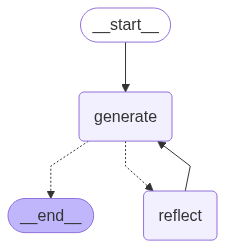

In [29]:
builder = StateGraph(State)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_edge(START, "generate")
# builder.add_conditional_edges("generate", should_continue)

builder.add_conditional_edges(
    "generate",
    should_continue,
    {
        "reflect": "reflect",
        "__end__": END
    }
)

builder.add_edge("reflect", "generate")
memory = InMemorySaver()
graph = builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

Testing with 3 rounds of reflection

In [31]:
config = {"configurable": {"thread_id": "1"}}
hint =  "Generate an essay on the topicality of The Little Prince and its message in modern life"

for event in graph.stream( # This process takes some time
    {
        "messages": [HumanMessage(content=hint)]
    },
    config,
):
    print(event)
    print("---")

{'generate': {'messages': [AIMessage(content='**The Timeless Relevance of "The Little Prince" in Modern Life**\n\nAntoine de Saint-Exupéry\'s "The Little Prince," first published in 1943, has transcended generations, captivating readers with its profound simplicity and poignant messages. While the narrative is often perceived as a children\'s tale, its themes resonate deeply with adults, addressing the complexities of human relationships, the essence of love, and the importance of seeing beyond the surface. In an age characterized by rapid technological advancement and social fragmentation, the lessons imparted by "The Little Prince" remain strikingly relevant, urging us to reconnect with our inner selves and the world around us.\n\nAt the heart of "The Little Prince" lies a critique of adult behavior and societal norms. The protagonist, a young boy from a distant asteroid, encounters various characters that embody the absurdities of adulthood—such as the businessman obsessed with coun

We can also see the details of each message

In [32]:
state = graph.get_state(config)
ChatPromptTemplate.from_messages(state.values["messages"]).pretty_print()

================================ Human Message =================================

Generate an essay on the topicality of The Little Prince and its message in modern life

================================== Ai Message ==================================

**The Timeless Relevance of "The Little Prince" in Modern Life**

Antoine de Saint-Exupéry's "The Little Prince," first published in 1943, has transcended generations, captivating readers with its profound simplicity and poignant messages. While the narrative is often perceived as a children's tale, its themes resonate deeply with adults, addressing the complexities of human relationships, the essence of love, and the importance of seeing beyond the surface. In an age characterized by rapid technological advancement and social fragmentation, the lessons imparted by "The Little Prince" remain strikingly relevant, urging us to reconnect with our inner selves and the world around us.

At the heart of "The Little Prince" lies a critique of a

And the final version is ...

In [33]:
final_version = state.values["messages"][-1].content
console.print(Markdown(final_version))

Thank you for your thoughtful critique and for highlighting the strengths of the essay! I appreciate your          
suggestions for further refinement. Here’s a final version of the essay that incorporates your recommendations,    
including improved transitions, a brief discussion on the impact of modern technology, and a final proofreading for
clarity.                                                                                                           

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
The Timeless Relevance of "The Little Prince" in Modern Life                                                       

In a world increasingly dominated by technology and material pursuits, Antoine de Saint-Exupéry's "The Little      
Prince" serves as a poignant reminder of the values that truly matter. First published in 1943, this beloved tale  
transcends generations, captivating readers with its profound simplicity and timeless messages. While often        
perceived as a children's story, its themes resonate deeply with adults, addressing the complexities of human      
relationships, the essence of love, and the importance of seeing beyond the surface. In an age characterized by    
rapid technological advancement and social fragmentation, the lessons imparted by "The Little Prince" remain       
strikingly relevant, urging us to reconnect with our inner selves and the world around us.                         

At the heart of "The Little Prince" lies a critique of adult behavior and societal norms. The protagonist, a young 
boy from a distant asteroid, encounters various characters that embody the absurdities of adulthood. For instance, 
the businessman who obsessively counts stars represents the folly of materialism, declaring, "I own the stars      
because I have never taken the time to look at them." This encounter serves as a mirror reflecting the misguided   
priorities of modern society, where success is frequently measured by wealth and status. In today's world, where   
ambition often overshadows genuine connection, Saint-Exupéry's narrative encourages readers to question these      
values and to seek deeper relationships, reminding us that "what is essential is invisible to the eye." This       
poignant reminder challenges us to prioritize emotional fulfillment over material gain, urging us to look beyond   
the superficial.                                                                                                   

Moreover, the relationship between the Little Prince and the fox encapsulates the essence of love and friendship.  
The fox's famous lesson, "You become responsible, forever, for what you have tamed," emphasizes the significance of
commitment and emotional bonds. This idea resonates profoundly in contemporary society, where relationships can    
often feel transient and superficial. The digital age has fostered a culture of instant gratification, leading to a
sense of isolation despite being more connected than ever. Social media, while providing a platform for connection,
often results in shallow interactions that lack depth. The Little Prince's journey teaches us that true connection 
requires time, effort, and vulnerability. As the fox further explains, "It is only with the heart that one can see 
rightly; what is essential is invisible to the eye." This wisdom invites us to cultivate meaningful relationships, 
highlighting that love and responsibility are foundational to our human experience.                                

The theme of childhood innocence and imagination serves as a powerful reminder of the importance of creativity and 
wonder in our lives. The Little Prince's perspective encourages adults to embrace their inner child, to dream, and 
to explore the world with curiosity. His encounters with the rose and the baobabs illustrate the beauty of         
nurturing relationships and the dangers of neglect.

---